DATA MINING TERM PROJECT INITIAL COMMIT TEAM 9

In [26]:
print("Data Mining - Group MÜKkemmel")

Data Mining - Group MÜKkemmel


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [28]:
url = 'https://raw.githubusercontent.com/kutlinho/Team9_CryptocurrencyForecasting/master/BTC-USD.csv'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [29]:
np.random.seed(0) 
df.sample(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-29,4171.620117,4214.629883,4039.290039,4163.069824,4163.069824,1367049984
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2015-04-29,225.591003,227.039993,223.429993,225.807999,225.807999,18936500
2014-11-01,338.649994,340.528992,321.054993,325.748993,325.748993,16677200
2019-02-02,3484.625977,3523.287354,3467.574707,3521.060791,3521.060791,5071623601
2016-01-31,378.292999,380.346985,367.834991,368.766998,368.766998,37894300
2019-08-11,11349.740234,11523.579102,11248.294922,11523.579102,11523.579102,15774371518
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2022-05-08,35502.941406,35502.941406,33878.964844,34059.265625,34059.265625,36763041910


In [30]:
missing_values_count = df.isnull().sum()
missing_values_count[0:15]

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
df.dropna()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125,70744.953125,34374900617
2024-03-29,70744.796875,70913.093750,69076.656250,69892.828125,69892.828125,25230851763
2024-03-30,69893.445313,70355.492188,69601.062500,69645.304688,69645.304688,17130241883


In [32]:
colomns_with_na_dropped = df.dropna(axis=1)
print("The number of columns after removing missing values : %d" % colomns_with_na_dropped.shape[1])

The number of columns after removing missing values : 6


In [33]:
data = df.filter(['Close'])
dataset = data.values

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.95284032],
       [0.97599833],
       [0.95362001]])

In [35]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
train_data

array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.5153576 ],
       [0.54207603],
       [0.49923653]])

In [36]:
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [38]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,batch_size=1)

Epoch 1/10
2728/2728 [==============================] - 41s 14ms/step - loss: 0.0017 - accuracy: 3.6657e-04
Epoch 2/10
2728/2728 [==============================] - 46s 17ms/step - loss: 6.8336e-04 - accuracy: 3.6657e-04
Epoch 3/10
2728/2728 [==============================] - 47s 17ms/step - loss: 4.6486e-04 - accuracy: 3.6657e-04
Epoch 4/10
2728/2728 [==============================] - 45s 17ms/step - loss: 4.0445e-04 - accuracy: 3.6657e-04
Epoch 5/10
2728/2728 [==============================] - 46s 17ms/step - loss: 3.3197e-04 - accuracy: 3.6657e-04
Epoch 6/10
2728/2728 [==============================] - 46s 17ms/step - loss: 2.7728e-04 - accuracy: 3.6657e-04
Epoch 7/10
2728/2728 [==============================] - 46s 17ms/step - loss: 3.2579e-04 - accuracy: 3.6657e-04
Epoch 8/10
2728/2728 [==============================] - 41s 15ms/step - loss: 2.6310e-04 - accuracy: 3.6657e-04
Epoch 9/10
2728/2728 [==============================] - 43s 16ms/step - loss: 2.8125e-04 - accuracy: 3.6657e

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
import plotly.graph_objects as go

# Plot training & validation accuracy values
fig = go.Figure()

fig.add_trace(go.Scatter(y = history.history['loss'],
                    mode='lines+markers',
                    name='Training loss'))
fig.update_layout(title_text = 'Loss of model')
fig.show()

In [41]:
import plotly.graph_objects as go

# Plot training & validation accuracy values
fig = go.Figure()

fig.add_trace(go.Scatter(y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))

fig.update_layout(title_text='Accuracy of model')
fig.show()


In [42]:
# Create the testing dataset
test_data = scaled_data[train_size-60:,:]    
test_data.shape

(757, 1)

In [43]:
X_test = []
y_test = dataset[train_size:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(697, 60, 1)

In [44]:
# Tahminler
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

22/22 [==============================] - 1s 10ms/step


In [45]:

train = data[:train_size]
valid = data[train_size:]
# data
#valid['Close']
len(predicted_price)

697

In [46]:
valid['Predictions'] = predicted_price
valid['Predictions'] 

C:\Users\kutlu\AppData\Local\Temp\ipykernel_9040\199531519.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date
2022-05-06    37470.535156
2022-05-07    36872.238281
2022-05-08    36252.132812
2022-05-09    34916.542969
2022-05-10    31503.773438
                  ...     
2024-03-28    69614.148438
2024-03-29    70714.656250
2024-03-30    69910.273438
2024-03-31    69655.109375
2024-04-01    71147.484375
Name: Predictions, Length: 697, dtype: float32

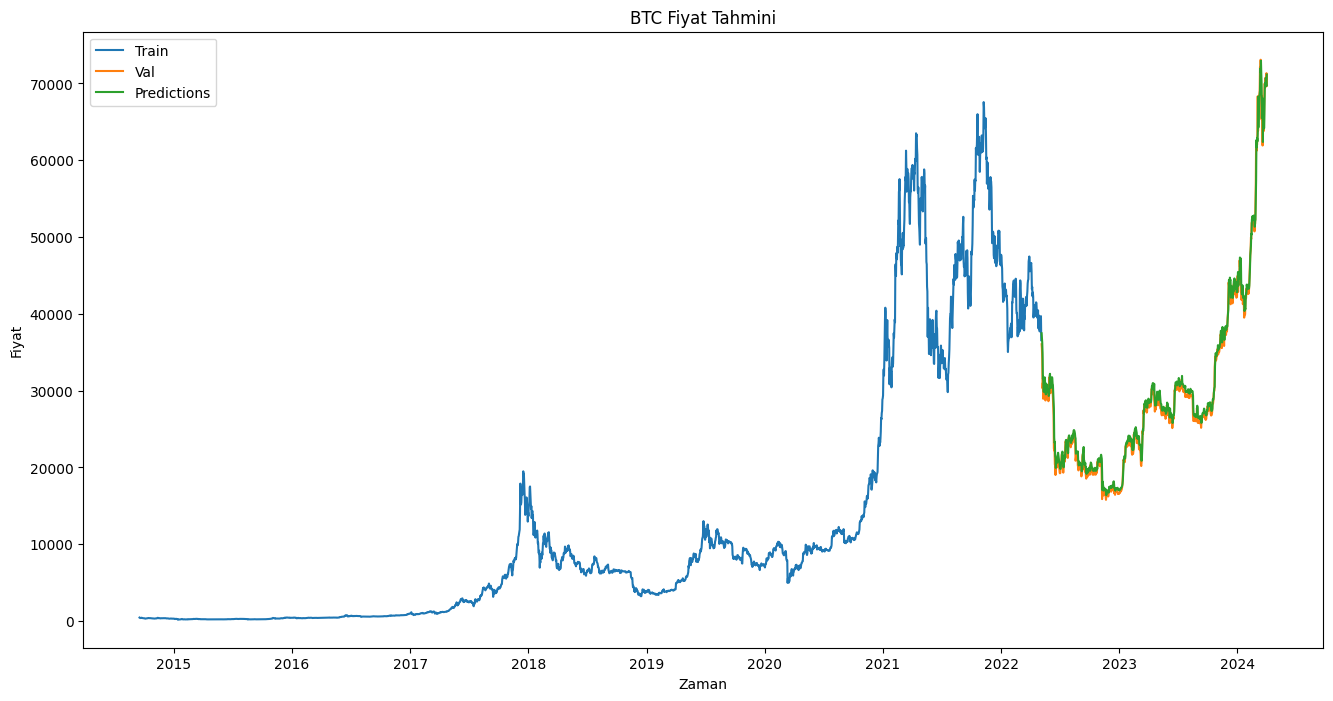

In [47]:
# Grafiği oluştur
plt.figure(figsize=(16, 8))

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title('BTC Fiyat Tahmini')
plt.xlabel('Zaman')
plt.ylabel('Fiyat')
plt.legend(['Train','Val','Predictions'],loc='upper left')
plt.show()


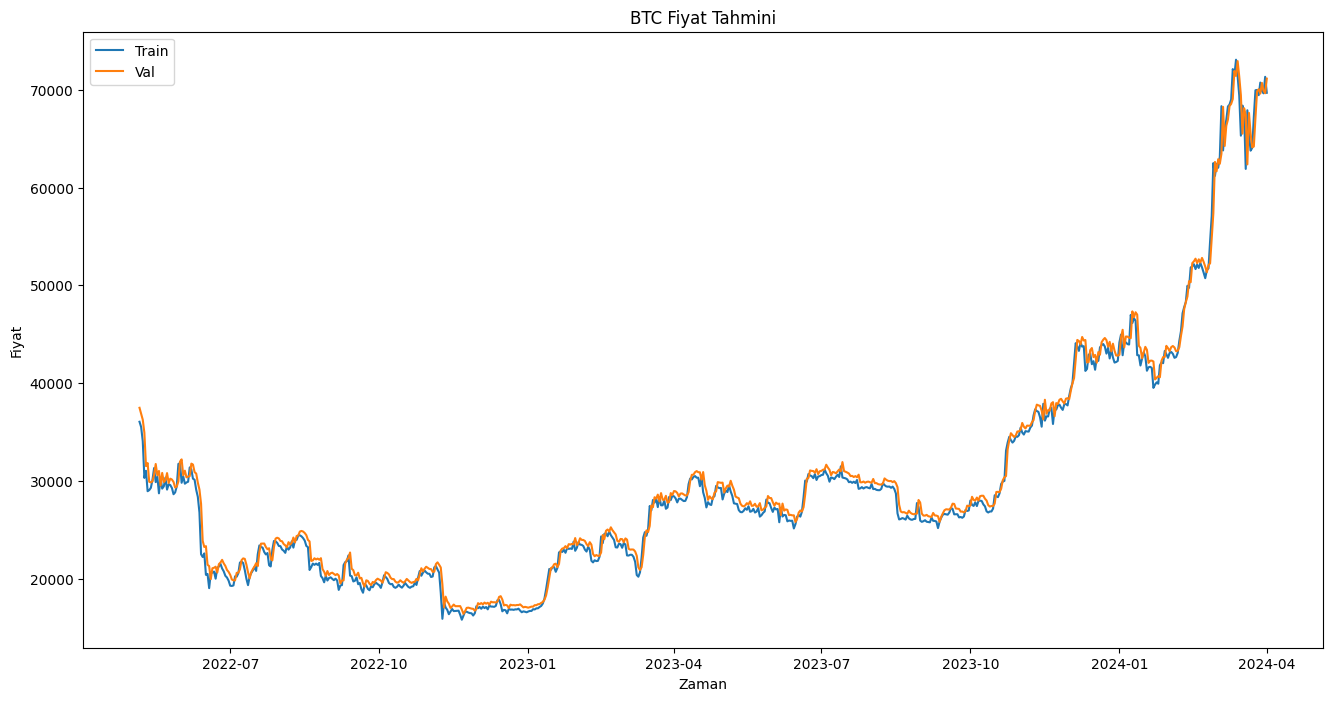

In [48]:
plt.figure(figsize=(16, 8))

plt.plot(valid[['Close','Predictions']])
plt.title('BTC Fiyat Tahmini')
plt.xlabel('Zaman')
plt.ylabel('Fiyat')
plt.legend(['Train','Val','Predictions'],loc='upper left')
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Restoring actual test data to original scale
true_values = scaler.inverse_transform(test_data[60:])

mae = mean_absolute_error(true_values, predicted_price)
mse = mean_squared_error(true_values, predicted_price)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((true_values - predicted_price) / true_values)) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')



MAE: 771.8403088631635
MSE: 1124924.0906777862
RMSE: 1060.6243871785082
MAPE: 2.7273487131038685


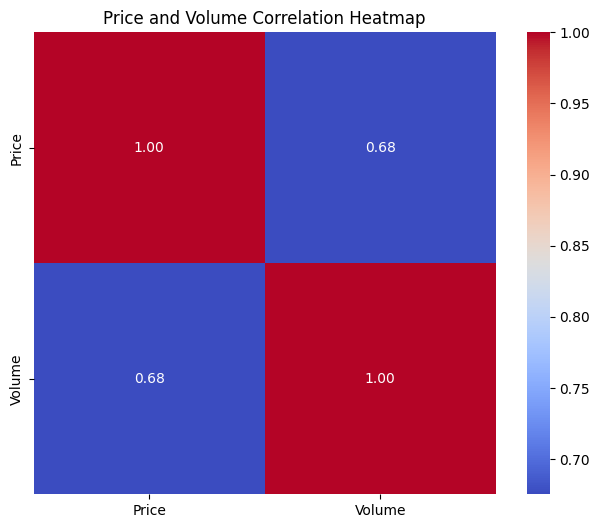

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

volumes = df['Volume'] 
close_prices = df['Close']  

data = {
    'Price': close_prices,
    'Volume': volumes
}
df = pd.DataFrame(data)

corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Price and Volume Correlation Heatmap')
plt.show()
